<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from sklearn import datasets
import torch

In [0]:
iris_data = datasets.load_iris()

x = torch.tensor([iris_data.data[:, 2], iris_data.data[:, 3]]).float()
n = x.size()[1]
u = torch.tensor([[x[0].mean()], [x[1].mean()]])
sigma = (x-u).mm((x-u).t()) / n

x_regula_0 = (x - u)[0] / (sigma[0, 0] ** .5)
x_regula_1 = (x - u)[1] / (sigma[1, 1] ** .5)

In [0]:
#s = sigma.eig(eigenvectors = True)[1]
#lam = s.inverse().mm(sigma.mm(s))
s_eigenvalue = sigma.eig(eigenvectors = True)[0][:,0]
lam = torch.tensor([[1,0],[0,1]])*(s_eigenvalue)

x_deco = lam.mm(x)

In [29]:
x

tensor([[1.4000, 1.4000, 1.3000, 1.5000, 1.4000, 1.7000, 1.4000, 1.5000, 1.4000,
         1.5000, 1.5000, 1.6000, 1.4000, 1.1000, 1.2000, 1.5000, 1.3000, 1.4000,
         1.7000, 1.5000, 1.7000, 1.5000, 1.0000, 1.7000, 1.9000, 1.6000, 1.6000,
         1.5000, 1.4000, 1.6000, 1.6000, 1.5000, 1.5000, 1.4000, 1.5000, 1.2000,
         1.3000, 1.4000, 1.3000, 1.5000, 1.3000, 1.3000, 1.3000, 1.6000, 1.9000,
         1.4000, 1.6000, 1.4000, 1.5000, 1.4000, 4.7000, 4.5000, 4.9000, 4.0000,
         4.6000, 4.5000, 4.7000, 3.3000, 4.6000, 3.9000, 3.5000, 4.2000, 4.0000,
         4.7000, 3.6000, 4.4000, 4.5000, 4.1000, 4.5000, 3.9000, 4.8000, 4.0000,
         4.9000, 4.7000, 4.3000, 4.4000, 4.8000, 5.0000, 4.5000, 3.5000, 3.8000,
         3.7000, 3.9000, 5.1000, 4.5000, 4.5000, 4.7000, 4.4000, 4.1000, 4.0000,
         4.4000, 4.6000, 4.0000, 3.3000, 4.2000, 4.2000, 4.2000, 4.3000, 3.0000,
         4.1000, 6.0000, 5.1000, 5.9000, 5.6000, 5.8000, 6.6000, 4.5000, 6.3000,
         5.8000, 6.1000, 5.1

Text(0, 0.5, 'width of iris')

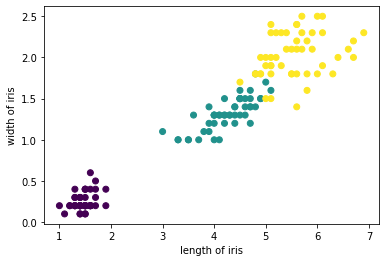

In [32]:
species = iris_data.target

plt.figure('Before regularization')
plt.scatter(x[0], x[1], c = species)
plt.xlabel('length of iris')
plt.ylabel('width of iris')

Text(0, 0.5, 'width of iris')

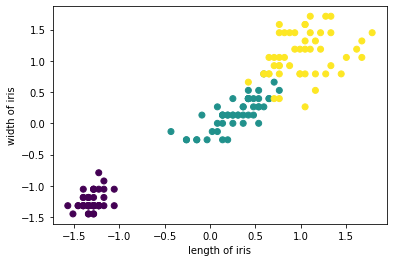

In [33]:
plt.figure('After regularization')
plt.scatter(x_regula_0, x_regula_1, c = species)
plt.xlabel('length of iris')
plt.ylabel('width of iris')

Text(0, 0.5, 'width of iris')

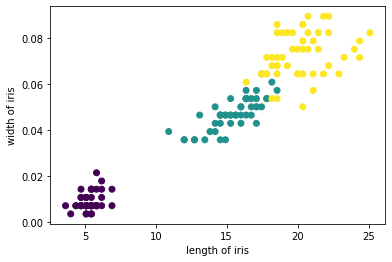

In [34]:
plt.figure('After decorrelation')
plt.scatter(x_deco[0], x_deco[1], c = species)
plt.xlabel('length of iris')
plt.ylabel('width of iris')